In [1]:
#important libraries
import numpy as np
import transformers
from transformers import AutoTokenizer

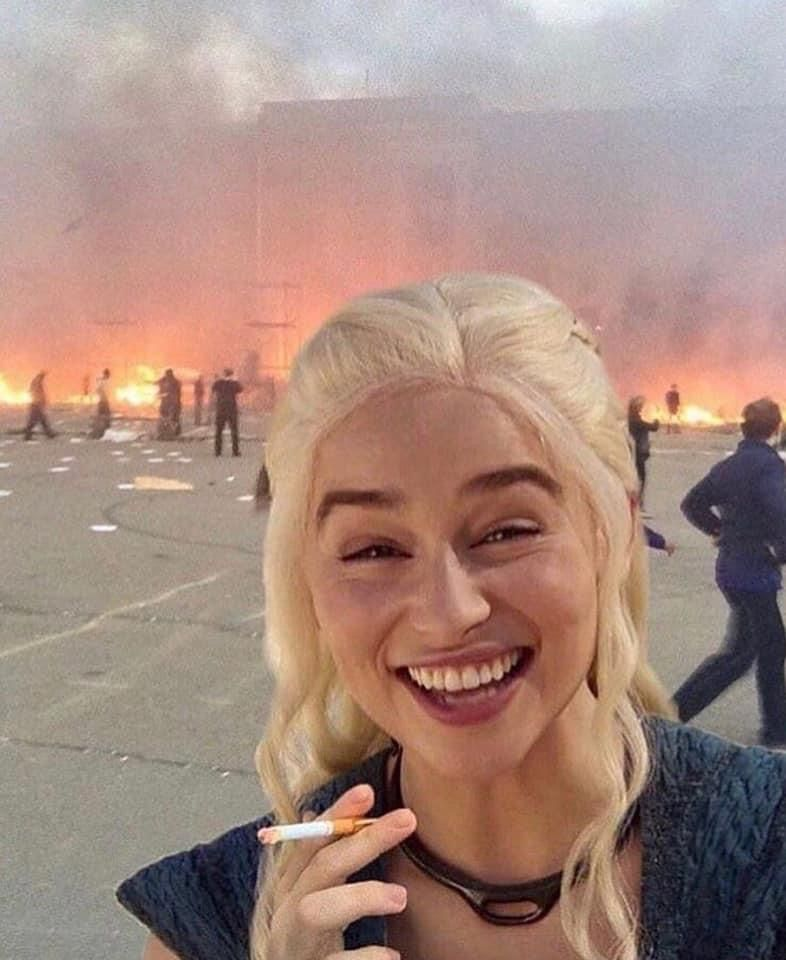

**In this notebook we are going to train a tokenizer for detecting the tokens from the text which written in Valyrian.**

In [2]:
model = 'tiiuae/falcon-7b'
tokenizer = AutoTokenizer.from_pretrained(model)

**We are going to use falcon7b tokenizer for base tokenizer. You may want to choose another. There is plenty of them in https://huggingface.co.**

In [3]:
file = open('/kaggle/input/high-valyrian-corpus-from-game-of-thrones/High Valyrian.txt')
corpus = file.read()
valyrian = corpus.splitlines() #Splitting text file by lines.

In [4]:
len(valyrian)

1279

In [5]:
def get_generator():
  return(
      valyrian[i:i+10]
      for i in range(0, len(valyrian), 10)
  )

#We defined the batch size as 10.

In order to train the tokenizer we need to iterate over batches. So, we have to create python generator object for this purpose.

In [6]:
valyrian_generator = get_generator()

In [7]:
sample = next(iter(valyrian_generator))
sample[0:2]

['Ānogar ziry aōhaeot se hēdrȳ jaelagon issi. Henujagon hen Pryjari, issi se hēdrȳ henujagon se Daenarī, arlūni issi se hēdrȳ henujagon se Ryndāro. Pryjari se ābrar issi se lēkia īlōnagon iā pōnta tolī. Daenarī se ondor issi se glaesagon jemēle iderēbza issa. Ryndāro se belma issi se hūnagon jorrāelagon se tolī henujagon daor.',
 'Henujagon jaelagon, Pryjari se qilōni se ossēnagon jorrāelagon henujagon tolvī. Daenarī se dōre issi se gūrēbzi jemēle iderēbza issa, se hēdrȳ se dōre jorrāelagon se ossēnagon pōnta. Ryndāro se hae issi se gūrēbzi jorrāelagon se ossēnagon jemēle henujagon qilōni.']

In [8]:
valyrian_tokenizer = tokenizer.train_new_from_iterator(sample, 1000)

**That's it our training phase is over! Let's compare the old tokenizer and new tokenizer in the same text data.**

In [9]:
valyrian[0]

'Ānogar ziry aōhaeot se hēdrȳ jaelagon issi. Henujagon hen Pryjari, issi se hēdrȳ henujagon se Daenarī, arlūni issi se hēdrȳ henujagon se Ryndāro. Pryjari se ābrar issi se lēkia īlōnagon iā pōnta tolī. Daenarī se ondor issi se glaesagon jemēle iderēbza issa. Ryndāro se belma issi se hūnagon jorrāelagon se tolī henujagon daor.'

In [10]:
example = tokenizer.tokenize(valyrian[0])

In [11]:
example_2 = valyrian_tokenizer.tokenize(valyrian[0])

In [12]:
print(example)

['Ä', 'Ģ', 'n', 'og', 'ar', 'Ġz', 'ir', 'y', 'Ġa', 'Åį', 'ha', 'e', 'ot', 'Ġse', 'Ġh', 'Äĵ', 'dr', 'È', '³', 'Ġj', 'ael', 'agon', 'Ġiss', 'i', '.', 'ĠHen', 'uj', 'agon', 'Ġhen', 'ĠPry', 'j', 'ari', ',', 'Ġiss', 'i', 'Ġse', 'Ġh', 'Äĵ', 'dr', 'È', '³', 'Ġhen', 'uj', 'agon', 'Ġse', 'ĠDa', 'en', 'ar', 'Ä«', ',', 'Ġar', 'l', 'Å«', 'ni', 'Ġiss', 'i', 'Ġse', 'Ġh', 'Äĵ', 'dr', 'È', '³', 'Ġhen', 'uj', 'agon', 'Ġse', 'ĠRy', 'nd', 'Äģ', 'ro', '.', 'ĠPry', 'j', 'ari', 'Ġse', 'Ġ', 'Äģ', 'br', 'ar', 'Ġiss', 'i', 'Ġse', 'Ġl', 'Äĵ', 'k', 'ia', 'ĠÄ', '«', 'l', 'Åį', 'n', 'agon', 'Ġi', 'Äģ', 'Ġp', 'Åį', 'nt', 'a', 'Ġtol', 'Ä«', '.', 'ĠDa', 'en', 'ar', 'Ä«', 'Ġse', 'Ġon', 'dor', 'Ġiss', 'i', 'Ġse', 'Ġgla', 'es', 'agon', 'Ġj', 'em', 'Äĵ', 'le', 'Ġ', 'ider', 'Äĵ', 'b', 'za', 'Ġiss', 'a', '.', 'ĠRy', 'nd', 'Äģ', 'ro', 'Ġse', 'Ġbel', 'ma', 'Ġiss', 'i', 'Ġse', 'Ġh', 'Å«', 'n', 'agon', 'Ġj', 'orr', 'Äģ', 'el', 'agon', 'Ġse', 'Ġtol', 'Ä«', 'Ġhen', 'uj', 'agon', 'Ġda', 'or', '.']


In [13]:
print(example_2)

['ÄĢnogar', 'Ġziry', 'ĠaÅįhaeot', 'Ġse', 'ĠhÄĵdrÈ', '³', 'Ġjaelagon', 'Ġissi', '.', 'ĠHenujagon', 'Ġhen', 'ĠPryjari', ',', 'Ġissi', 'Ġse', 'ĠhÄĵdrÈ', '³', 'Ġhenujagon', 'Ġse', 'ĠDaenarÄ«', ',', 'ĠarlÅ«ni', 'Ġissi', 'Ġse', 'ĠhÄĵdrÈ', '³', 'Ġhenujagon', 'Ġse', 'ĠRyndÄģro', '.', 'ĠPryjari', 'Ġse', 'ĠÄģbrar', 'Ġissi', 'Ġse', 'ĠlÄĵkia', 'ĠÄ«lÅįnagon', 'ĠiÄģ', 'ĠpÅįnta', 'ĠtolÄ«', '.', 'ĠDaenarÄ«', 'Ġse', 'Ġondor', 'Ġissi', 'Ġse', 'Ġglaesagon', 'ĠjemÄĵle', 'ĠiderÄĵbza', 'Ġissa', '.', 'ĠRyndÄģro', 'Ġse', 'Ġbelma', 'Ġissi', 'Ġse', 'ĠhÅ«nagon', 'ĠjorrÄģelagon', 'Ġse', 'ĠtolÄ«', 'Ġhenujagon', 'Ġdaor', '.']


**As you can see our 'new' tokenizer did pretty good job when tokenizing the same text. It can catch the words easily!**

In [14]:
valyrian_tokenizer.vocab_size

293

**Vocabulary size is 293! Which means our tokenizer has just 293 unique tokens!**

In [15]:
#valyrian_tokenizer.save_pretrained('valyrian-tokenizer')

The code below will help us to save our tokenizer, for further uses!

# THE END!

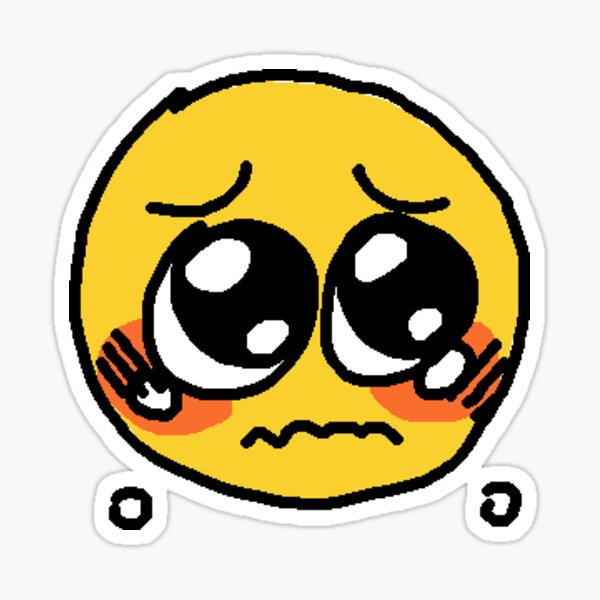

**If you like this notebook please give an upvote.**
**Thank you everybody who read this entire notebook, be safe!**